# Final Project Scenarios 

Anne Louise Seekford  
#### Goal: to demonstrate use of the Monte Carlo simulator.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load montecarlo.py classes
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer


### Scenario 1: a two-headed coin

In [4]:
# Create a "fair" coin: one side heads (weight = 1), one side tails (weight = 1)

fair_coin = Die(['H', 'T'])
fair_coin.show_die()

,faces,weights
0,H,1
1,T,1


In [7]:
# Create an "unfair" coin: one side heads (weight = 1), one side tails (weight = 1)

unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5.0) #Change the weight of Heads to 5 to make it "unfair"

In [8]:
unfair_coin.show_die()

,faces,weights
0,H,5
1,T,1


In [9]:
# Play a game of 1000 flips of three fair coins

fair_coins = [fair_coin, fair_coin, fair_coin] #Create a list of coins to pass to Dice parameter 
fair_game = Game(fair_coins)
fair_game.play(1000) #Flip coin 1,000 times
fair_game.show_results() #Look at how many times it landed on Heads and Tails, respectively

,0,1,2
roll,,,
0,H,T,H
1,T,T,H
2,T,H,T
3,H,H,H
4,T,T,H
...,...,...,...
995,T,T,T
996,H,T,H
997,H,H,T


In [11]:
unfair_coin2 = Die(['H', 'T'])
unfair_coin2.change_weight('H', 5.0) #Change the weight of Heads to 5 to make it "unfair"

In [12]:
# Play a game of 1000 flips with two unfair coints and one fair coin

medley_coins = [fair_coin, unfair_coin, unfair_coin2] #Create a list of coins to pass to Dice parameter 
medley_game = Game(medley_coins)
medley_game.play(1000) #Flip coin 1,000 times
medley_game.show_results() 

,0,1,2
roll,,,
0,T,H,H
1,H,H,H
2,H,H,H
3,H,H,H
4,H,H,H
...,...,...,...
995,H,H,T
996,H,H,H
997,T,H,T


In [15]:
# Fair Coins: use an Analyzer object to determine the 
#    relative frequency of jackpots – getting either all Hs or all Ts.

fair_ana = Analyzer(fair_game, 1000)
fair_ana.jackpot()

246

In [16]:
# Fair Coins: Compute relative frequency as the number of jackpots over the total number of rolls

fair_rf = (fair_ana.jackpot()) / 1000
print(fair_rf*100,  '%')

24.6 %


In [18]:
# Medley of Fair and Unfair Coins: use Analyzer to determine the 
#    relative frequency of jackpots – getting either all Hs or all Ts.

medley_ana = Analyzer(medley_game, 1000)
medley_ana.jackpot()

336

In [19]:
# Medley of Fair and Unfair Coins: Compute relative frequency as the number of jackpots over the total number of rolls

medley_rf = (medley_ana.jackpot()) / 1000
print(medley_rf*100,  '%')

33.6 %


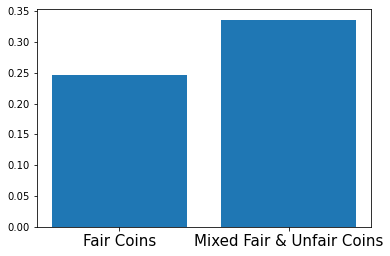

In [20]:
# Show your results, comparing the two relative frequencies, in a simple bar chart

plt.bar(x=['Fair Coins', 'Mixed Fair & Unfair Coins'], height= [fair_rf, medley_rf])
plt.xticks(size=15)
plt.show()

### Scenario 2: a six-sided die

In [21]:
# Create a fair die (with six sides)

fair_die = Die(['Side 1', 'Side 2', 'Side 3', 'Side 4', 'Side 5', 'Side 6'])
fair_die.show_die()

,faces,weights
0,Side 1,1
1,Side 2,1
2,Side 3,1
3,Side 4,1
4,Side 5,1
5,Side 6,1


In [23]:
# Create an unfair die (with six sides), biased towards Side 6

unfair_die1 = Die(['Side 1', 'Side 2', 'Side 3', 'Side 4', 'Side 5', 'Side 6'])
unfair_die1.change_weight('Side 6', 5)
unfair_die1.show_die()

,faces,weights
0,Side 1,1
1,Side 2,1
2,Side 3,1
3,Side 4,1
4,Side 5,1
5,Side 6,5


In [24]:
# Create an unfair die (with six sides), biased towards Side 1

unfair_die2 = Die(['Side 1', 'Side 2', 'Side 3', 'Side 4', 'Side 5', 'Side 6'])
unfair_die2.change_weight('Side 1', 5)
unfair_die2.show_die()

,faces,weights
0,Side 1,5
1,Side 2,1
2,Side 3,1
3,Side 4,1
4,Side 5,1
5,Side 6,1


In [26]:
# Play a game of 10000 rolls with 5 fair dice

fair_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_game.play(10000)
fair_ana = Analyzer(fair_game, 10000)
fair_ana.jackpot()

7

In [31]:
# Fair: Determine the relative frequency of jackpots & compute relative frequency as the number of jackpots over the total number of rolls

fair_rf = (fair_ana.jackpot()) / 10000
print(fair_rf*100,  '%')

0.06999999999999999 %


In [28]:
# Play a game of 10,000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice

unfair_game = Game([unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die])
unfair_game.play(10000)
unfair_ana = Analyzer(unfair_game, 10000)
unfair_ana.jackpot()

10

In [32]:
# Unfair: Determine the relative frequency of jackpots & compute relative frequency as the number of jackpots over the total number of rolls

unfair_rf = (unfair_ana.jackpot()) / 10000
print(unfair_rf*100,  '%')

0.1 %


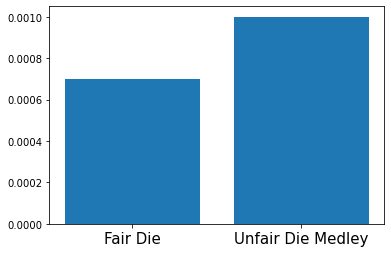

In [33]:
# Compare the relative frequencies 

plt.bar(x=['Fair Die', 'Unfair Die Medley'], height= [fair_rf, unfair_rf])
plt.xticks(size=15)
plt.show()

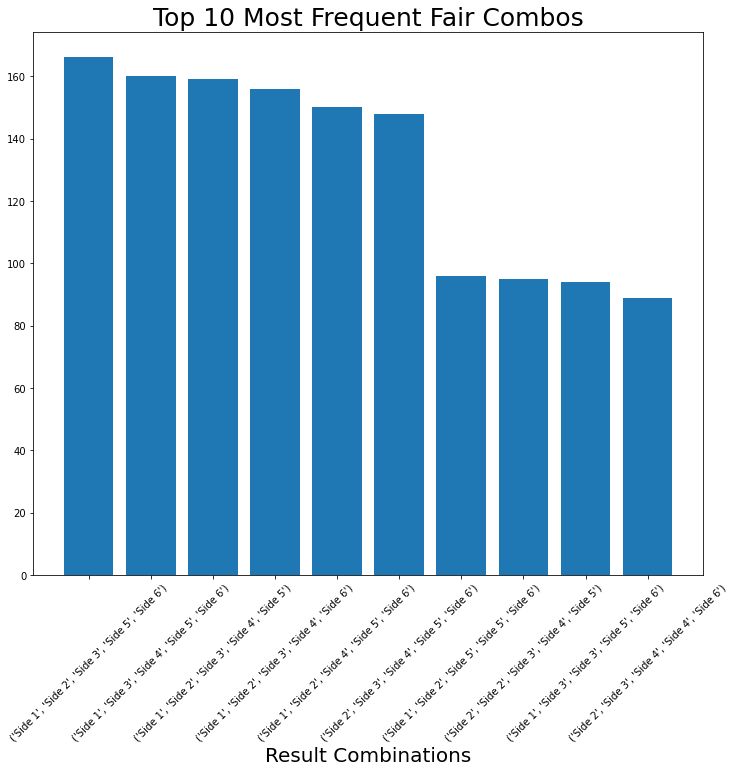

In [48]:
# Computes the 10 most frequent combinations of faces for the fair game

plt.figure(figsize=[12,10])

frequent_combo = fair_ana.combo()[0:10]
plt.bar(["".join(str(tup)) for tup in frequent_combo.index.tolist()], frequent_combo['size'].to_list());
plt.xticks(rotation=45, size=10)
plt.xlabel("Result Combinations", fontsize = 20)
plt.title('Top 10 Most Frequent Fair Combos', fontsize = 25)
plt.show()

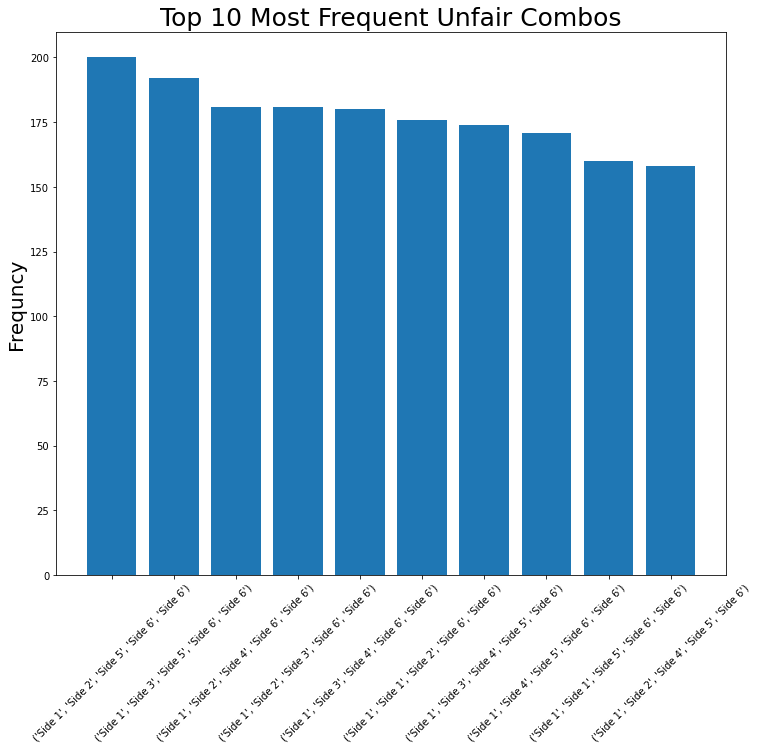

In [47]:
# Computes the 10 most frequent combinations of faces for the unfair game 

plt.figure(figsize=[12,10])

frequent_combo = unfair_ana.combo()[0:10]
plt.bar(["".join(str(tup)) for tup in frequent_combo.index.tolist()], frequent_combo['size'].to_list());
plt.xticks(rotation=45, size=10)
plt.xlabel("Result Combinations", fontsize = 20)
plt.title('Top 10 Most Frequent Unfair Combos', fontsize = 25)
plt.show()

### Scenario 3: letters of the roman alphabet

In [49]:
# Create a "die" of letters from a to z 

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

alpha = Die(letters)

In [53]:
# Denote the weights based on their frequency of usage

alpha.change_weight('A', 8.4966)
alpha.change_weight('B', 2.0720)
alpha.change_weight('C', 4.5388)
alpha.change_weight('D', 3.3844)
alpha.change_weight('E', 11.1607)
alpha.change_weight('F', 1.8121)
alpha.change_weight('G', 2.4705)
alpha.change_weight('H' ,3.0034)
alpha.change_weight('I', 7.5448)
alpha.change_weight('J', 0.1965)
alpha.change_weight('K', 1.1016)
alpha.change_weight('L', 5.4893)
alpha.change_weight('M', 3.0129)
alpha.change_weight('N', 6.6544)
alpha.change_weight('O', 7.1635)
alpha.change_weight('P', 3.1671)
alpha.change_weight('Q', 0.1962)
alpha.change_weight('R', 7.5809)
alpha.change_weight('S', 5.7351)
alpha.change_weight('T', 6.9509)
alpha.change_weight('U', 3.6308)
alpha.change_weight('V', 1.0074)
alpha.change_weight('W', 1.2899)
alpha.change_weight('X', 0.2902)
alpha.change_weight('Y', 1.7779)
alpha.change_weight('Z', 0.2722)

In [55]:
# See what it looks like 

alpha.show_die()

,faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


In [57]:
# Play a game involving 5 of these dice with 1000 rolls

words = Game([alpha, alpha, alpha, alpha, alpha])
words.play(1000)
word_ana = Analyzer(words, 1000)

In [69]:
# Goal: find english words with the combination of letters

lists = words.show_results().values #Make a list of the combinations
word_df = pd.DataFrame(lists, columns = [' ', ' ', ' ', ' ', ' '])
word_df

,,,,,
0,O,S,D,R,P
1,H,I,S,E,T
2,H,D,D,B,E
3,C,S,N,I,N
4,L,D,N,C,E
...,...,...,...,...,...
995,D,K,Y,C,E
996,I,A,P,O,A
997,E,A,P,N,D
998,H,G,C,V,A


In [71]:
pd.set_option('display.max_rows', None)

In [72]:
# Lets see the first 100 results to estimate a relative frequency

word_df.head(100)

,,,,,
0,O,S,D,R,P
1,H,I,S,E,T
2,H,D,D,B,E
3,C,S,N,I,N
4,L,D,N,C,E
5,C,N,N,N,O
6,E,D,I,R,A
7,C,M,A,T,A
8,E,I,C,I,Y
9,L,E,X,E,B


Looking through the first 100 results, I found "words" Facon (row 89) and Parte (row 31). 

From the head of the results we can say the rough estimate for relative freuquency is $2\%$. 